<a href="https://colab.research.google.com/github/brahma102/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Mobile Price Range Prediction**

In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.

# **Data Description -**

* Battery_power - Total energy a battery can store in one time measured in mAh
* Blue - Has bluetooth or not
* Clock_speed - speed at which microprocessor executes instructions
* Dual_sim - Has dual sim support or not
* Fc - Front Camera mega pixels
* Four_g - Has 4G or not
* Int_memory - Internal Memory in Gigabytes
* M_dep - Mobile Depth in cm
* Mobile_wt - Weight of mobile phone
* N_cores - Number of cores of processor
* Pc - Primary Camera mega pixels
* Px_height - Pixel Resolution Height
* Px_width - Pixel Resolution Width
* Ram - Random Access Memory in Mega Bytes
* Sc_h - Screen Height of mobile in cm
* Sc_w - Screen Width of mobile in cm
* Talk_time - longest time that a single battery charge will last when you are
* Three_g - Has 3G or not
* Touch_screen - Has touch screen or not
* Wifi - Has wifi or not
* Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
* 2(high cost) and 3(very high cost).





# **Importing Libraries**

In [42]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix , plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

In [43]:
# Install plotly package to show output in png format so i show it in github
%%capture
!pip install kaleido
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

# **Loading Data set**

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
path  = "/content/drive/MyDrive/Colab Notebooks/Capstone Project 3/data_mobile_price_range.csv"
data = pd.read_csv(path ,header= 0,encoding= 'unicode_escape')

In [46]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [48]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [49]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [50]:
data['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [51]:
data['fc'].value_counts()

0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: fc, dtype: int64

In [52]:
# data['four_g'].value_counts()
data.groupby(['price_range','four_g']).count()

battery_power  blue  clock_speed  dual_sim   fc  \
price_range four_g                                                    
0           0                 241   241          241       241  241   
            1                 259   259          259       259  259   
1           0                 238   238          238       238  238   
            1                 262   262          262       262  262   
2           0                 253   253          253       253  253   
            1                 247   247          247       247  247   
3           0                 225   225          225       225  225   
            1                 275   275          275       275  275   

                    int_memory  m_dep  mobile_wt  n_cores   pc  px_height  \
price_range four_g                                                          
0           0              241    241        241      241  241        241   
            1              259    259        259      259  259        259   
1           0              238    238        238      238  238        238   
            1              262    262        262      262  262        262   
2           0              253    253        253      253  253        253   
            1              247    247        247      247  247        247   
3           0              225    225        225      225  225        225   
            1              275    275        275      275  275        275   

                    px_width  ram  sc_h  sc_w  talk_time  three_g  \
price_range four_g                                                  
0           0            241  241   241   241        241      241   
            1            259  259   259   259        259      259   
1           0            238  238   238   238        238      238   
            1            262  262   262   262        262      262   
2           0            253  253   253   253        253      253   
            1            247  247   247   247        247      247   
3           0            225  225   225   225        225      225   
            1            275  275   275   275        275      275   

                    touch_screen  wifi  
price_range four_g                      
0           0                241   241  
            1                259   259  
1           0                238   238  
            1                262   262  
2           0                253   253  
            1                247   247  
3           0                225   225  
            1                275   275

In [53]:
data['dual_sim'].value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

In [54]:
data['n_cores'].value_counts()

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64

# **Explortory Data Analys**

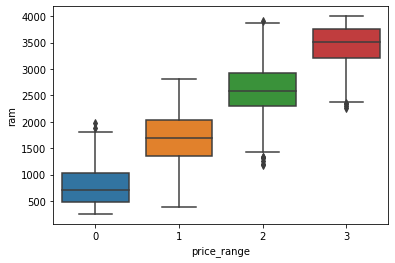

In [55]:
#Boxplot between ram and price_range
sns.boxplot(y = 'ram' , x = 'price_range',data= data)
plt.show()

In [56]:
column=data.columns
column.shape

(21,)

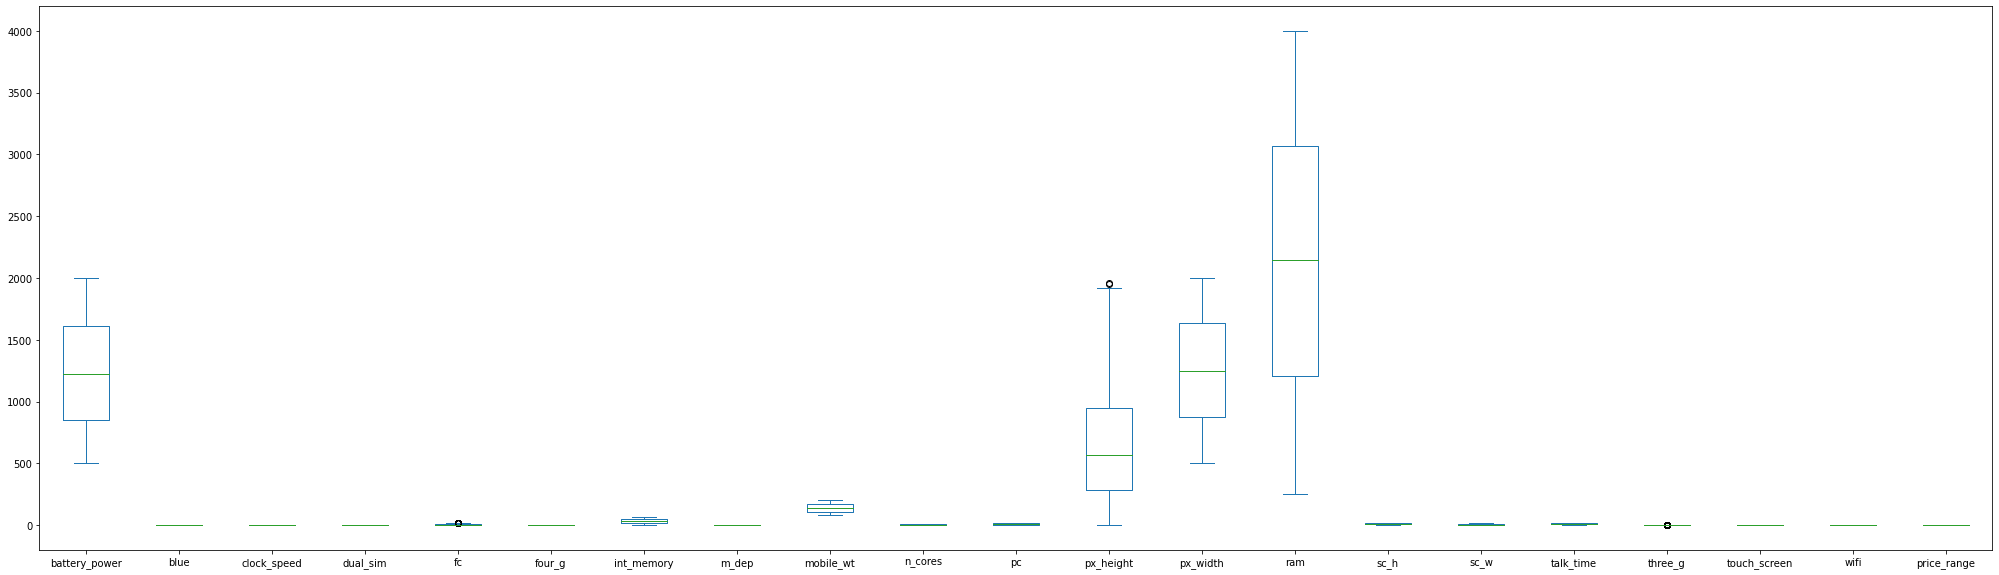

In [57]:
data.plot(kind='box',figsize=(35,10))
plt.show()

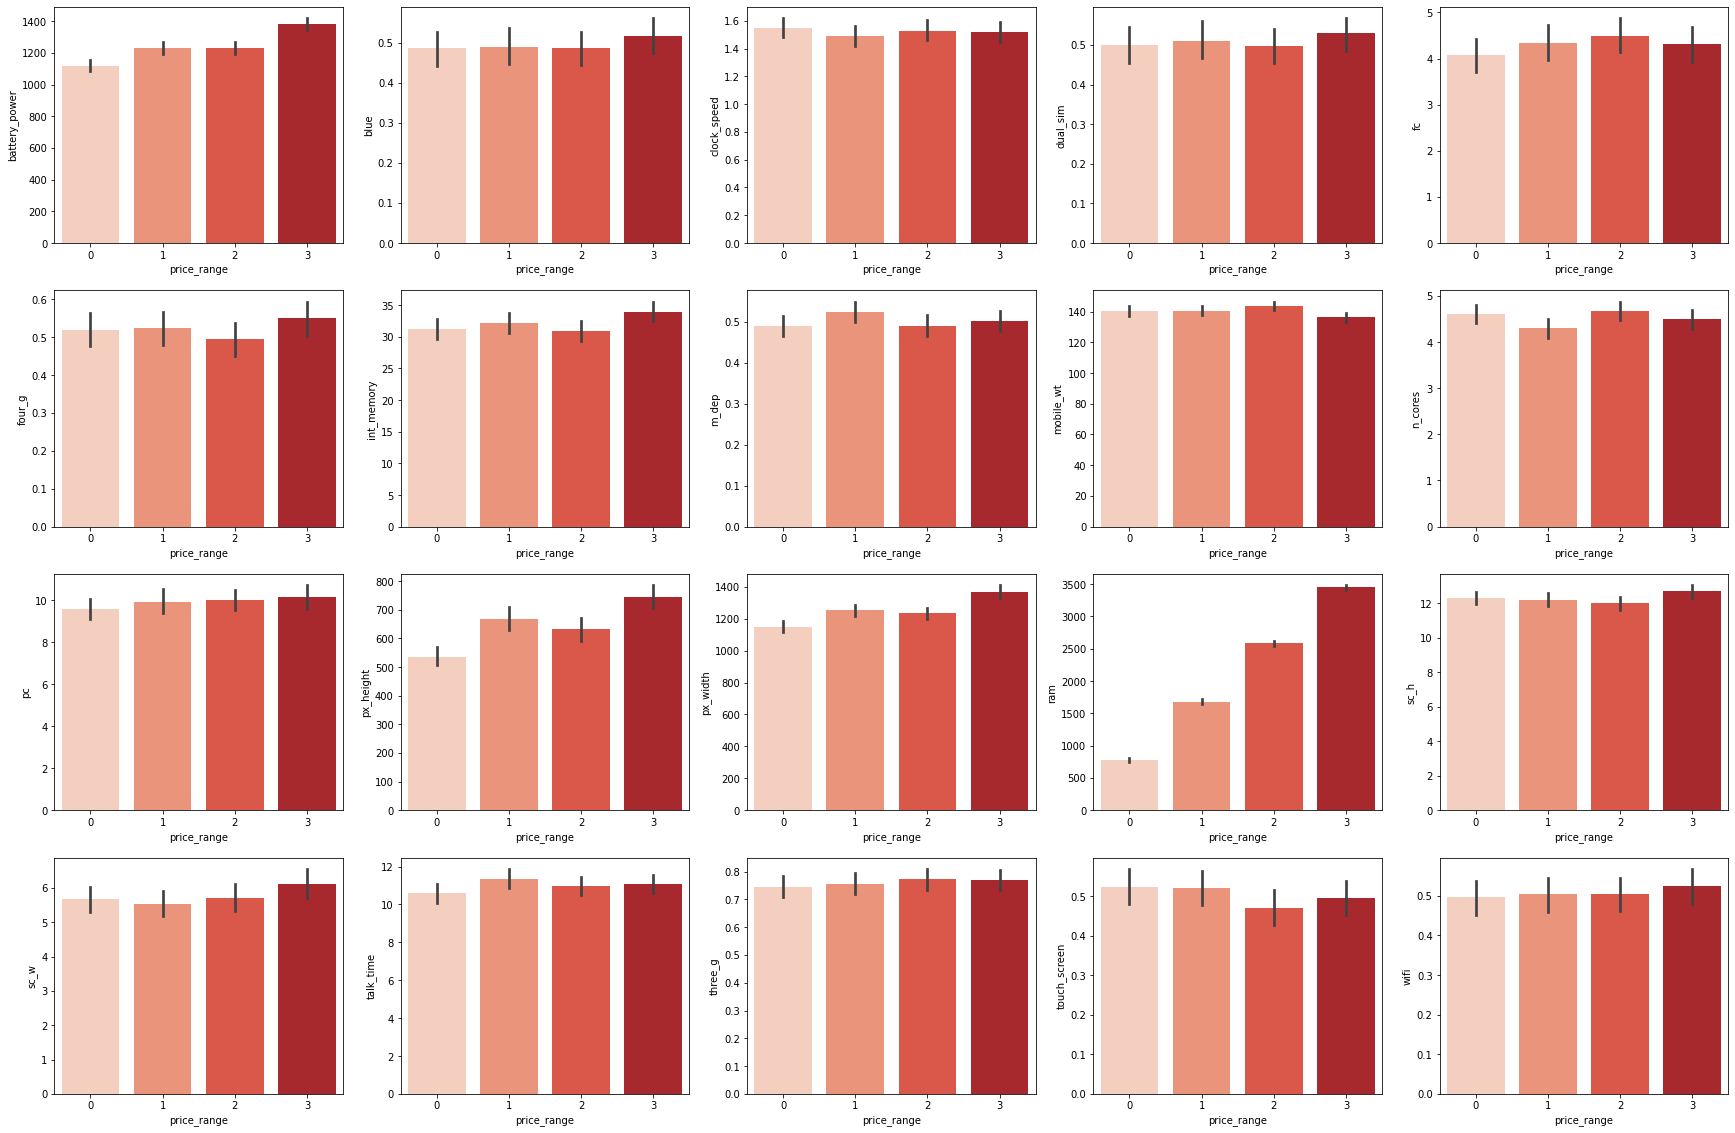

In [58]:
fig, axes = plt.subplots(4, 5, figsize=(30, 20))
k=0
for i in range(4):
  for j in range(5):
 
      sns.barplot(ax=axes[i, j],data=data,x='price_range',y=column[k],palette = 'Reds')
 
      k=k+1

. Here we see that Ram of phone and price are highly corelated.Incress in ram Incress in price.

. After that 4g_band and batry of phone also afect phone price.

. Mobile wt is decrese when price high, but mobile size is increase.

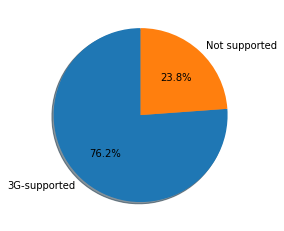

In [59]:
#percentage of phones which support 3g
labels = ["3G-supported",'Not supported']
values=data['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

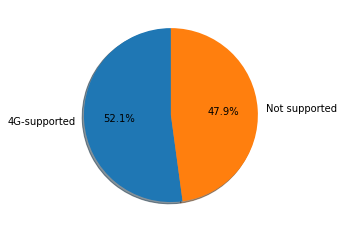

In [60]:
#percentage of phones which support 4g
labels = ["4G-supported",'Not supported']
values=data['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

## **Plotting Relation between Price Range & 3G/4G**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



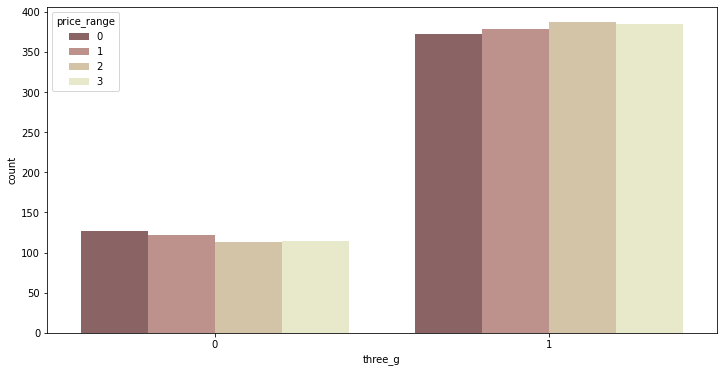

In [61]:
plt.figure(figsize = (12,6))
sns.countplot(data['three_g'] , hue = data['price_range'] , palette = 'pink')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



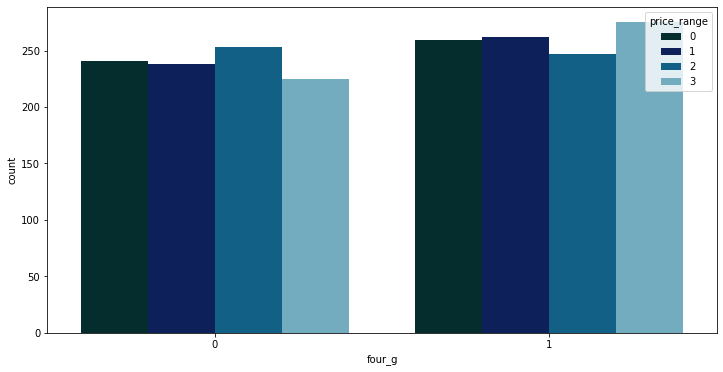

In [62]:
plt.figure(figsize = (12,6))
sns.countplot(data['four_g'] , hue = data['price_range'] , palette = 'ocean')
plt.show()

## **Plotting Relation between Price Range & Memory**

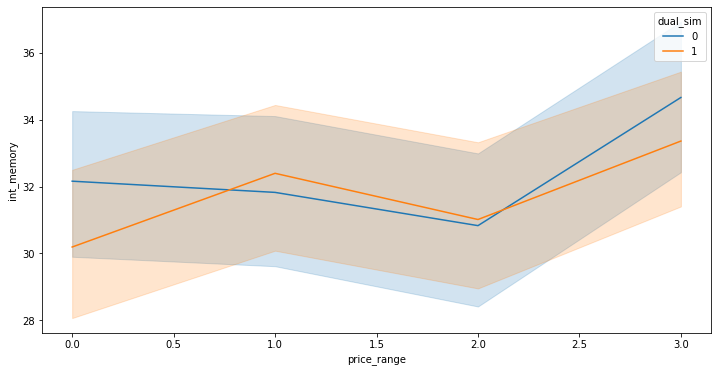

In [63]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'price_range' , y = 'int_memory' , data = data , hue = 'dual_sim')
plt.show()

There is increase in internal memory for very high prices.

# **Correlation**

In this section we will try to find relationship of each variables, their importance and impact on our dependent variable.

In [64]:
data.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [65]:
corr = data.corr()
import plotly.express as px
fig = px.imshow(corr, text_auto=".2f", color_continuous_scale='hot', aspect="auto")
fig.show()

Points to note from above heatmap:

pc is correlated with fc.

three_g and four_g are moderately correlated.

sc_h and sc_w are moderately correlated. We will change them into a single variable.

px_width and px_height are moderately correlated. We will try to change them into a single variable.

ram is highly correlated with our price range. May be one the most important factor in determining the price.

In [66]:
# data['mobile_size']=data['px_height']*data['px_width']
# data['screen_size']=data['sc_w']*data['sc_h']

We cannot create mobile screen_size=px_height * px_width because , there are may data whose height/ weidth is 0 .

if we mulitiplly it show 0 size which may afect our data.

In [67]:
corr=data.corr()
fig = px.imshow(corr, text_auto=".2f", color_continuous_scale='hot', aspect="auto")
fig.show()

In [68]:
# data.drop(['px_height','px_width'],axis=1,inplace=True)

In [69]:
# corr=data.corr()
# fig = px.imshow(corr, text_auto=".2f", color_continuous_scale='hot', aspect="auto")
# fig.show()

# **Handling Outliers**

In [70]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [71]:
# find Numerical variables
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 21 numerical variables


In [72]:
# Here we taken if no of variable in a colum is graterthan 20 we take as continious otherwise we take it as discrite ..It help to calulate outlayers
discrete = []
for var in numerical:
    if len(data[var].unique())<20:
        print(var, ' values: ', data[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

blue  values:  [0 1]
dual_sim  values:  [0 1]
four_g  values:  [0 1]
m_dep  values:  [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
n_cores  values:  [2 3 5 6 1 8 4 7]
sc_h  values:  [ 9 17 11 16  8 13 19  5 14 18  7 10 12  6 15]
sc_w  values:  [ 7  3  2  8  1 10  9  0 15 13  5 11  4 12  6 17 14 16 18]
talk_time  values:  [19  7  9 11 15 10 18  5 20 12 13  2  4  3 16  6 14 17  8]
three_g  values:  [0 1]
touch_screen  values:  [0 1]
wifi  values:  [1 0]
price_range  values:  [1 2 3 0]
There are 12 discrete variables


In [73]:
continuous = [var for var in numerical if var not in discrete and var not in ['price_range']]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



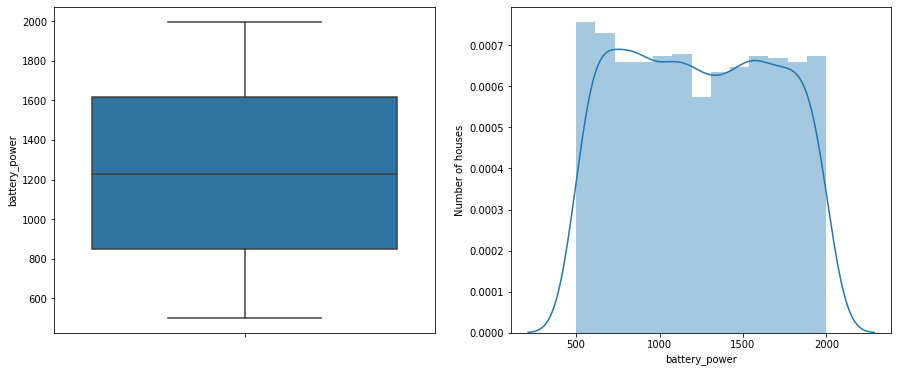

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



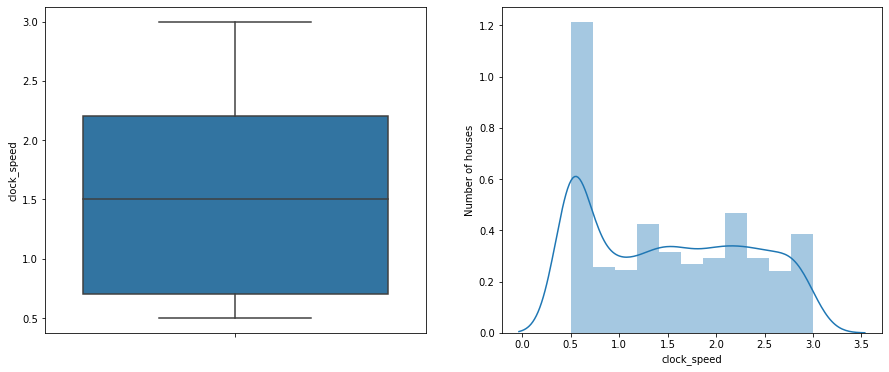

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



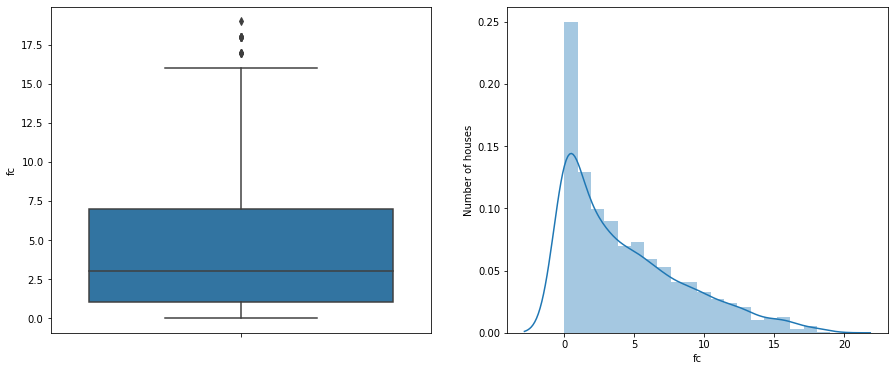

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



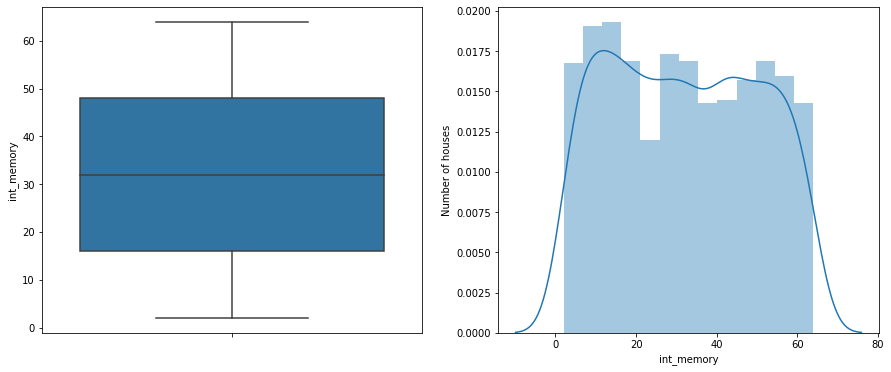

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



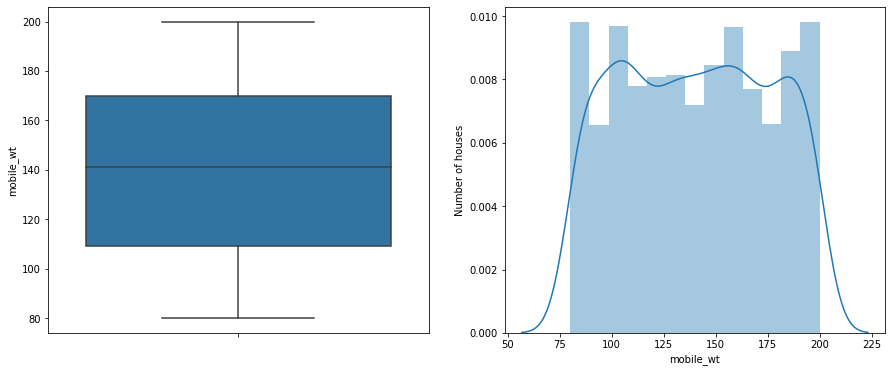

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



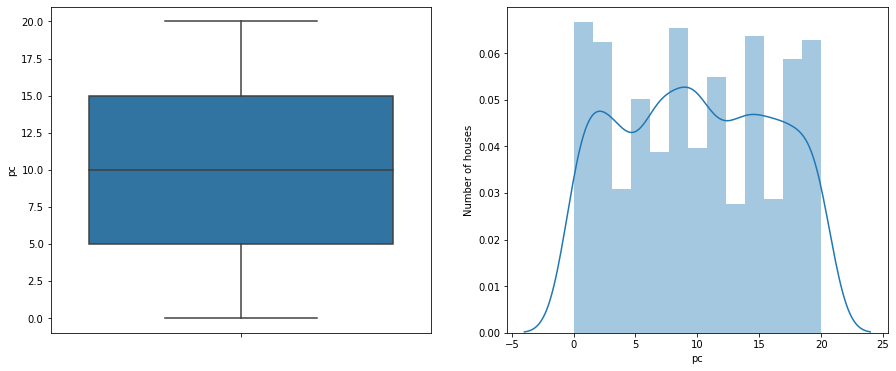

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



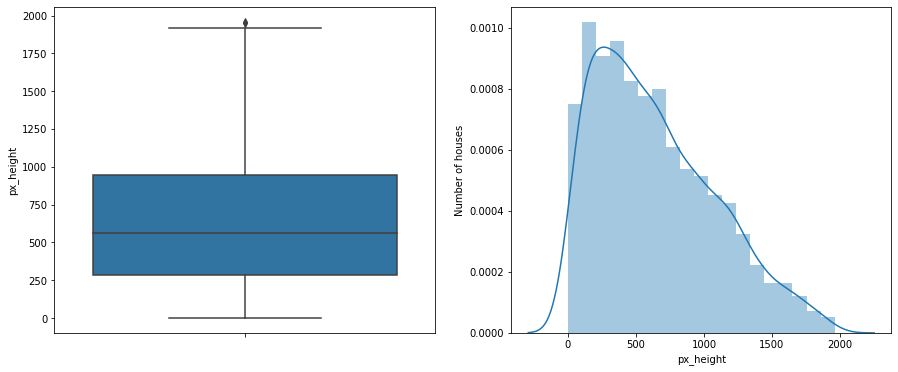

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



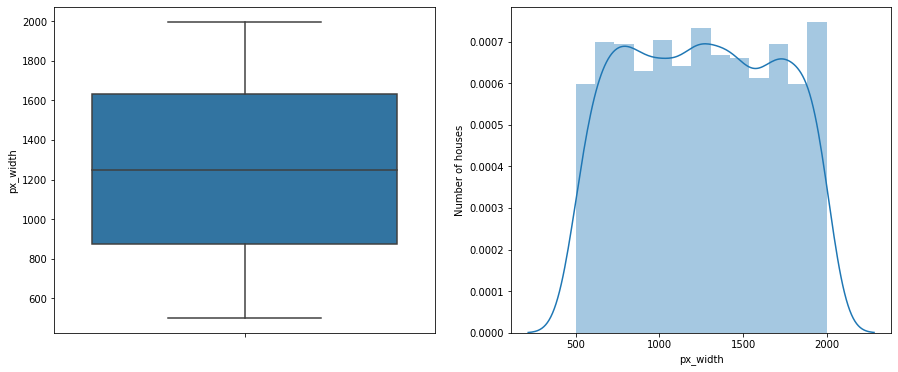

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



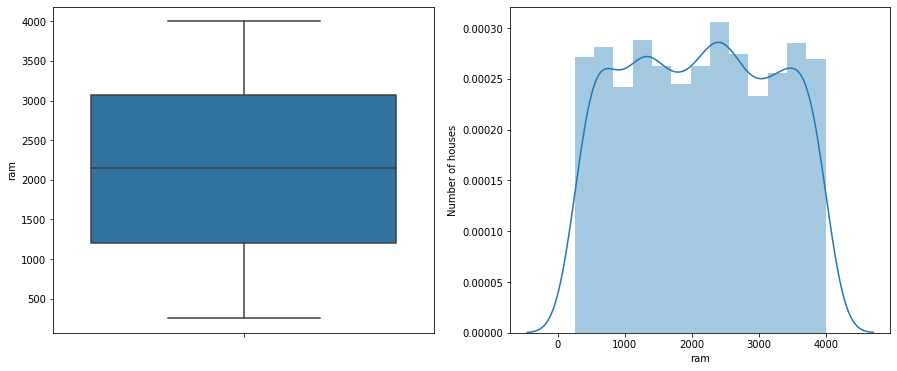

In [74]:
for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=data[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(data[var].dropna())
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)

    plt.show()

Here we se in most of the case outlayers are not present .

# **Splitting the data**

In [75]:
#independent variables
X = data.drop('price_range',axis=1)

In [76]:
#dependent variable
y = data['price_range']

In [77]:
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [78]:
print(X_train.shape)
print(X_test.shape)

(1400, 20)
(600, 20)


In [79]:
q=X_train[X_train['sc_w']==0]
pd.get_option("display.max_columns")

In [80]:
# settings to display all columns
pd.set_option("display.max_columns", None)
# display the dataframe head

In [81]:
q.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

# **Scalling the dataset**

In [82]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [83]:
# X_train[1]